In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import vtk

In [4]:
xhalf = 0.02/2
ymin = 0.01
ymax = 0.02
xcrack = 0.05
ycrack = 0.01
n = 512

In [5]:
xarea = np.array([0,0,0.1,0.1,0])
yarea = np.array([0,0.1,0.1,0,0])

In [6]:
xareaPD = np.array([0.04,0.04,0.06,0.06,0.04])
yareaPD = np.array([0.01,0.03,0.03,0.01,0.01])

In [7]:
h = xhalf/n
h
h = (xhalf-h/2) / n
h 

1.9512176513671876e-05

In [8]:
delta = 16 * h
delta

0.00031219482421875

In [9]:
x = []
y = []
volume = []
for j in range(0,int(2*ycrack/h)+1):
    for i in range(0,n+1):
        x.append(0.05-h/2-i*h)
        y.append(0.01+j*h)

for j in range(0,int(2*ycrack/h)+1):
    for i in range(0,n+1):
        x.append(0.05+h/2+i*h)
        y.append(0.01+j*h)
    
minx = min(x)
maxx = max(x)
miny = min(y)
maxy = max(y)
    
for x_, y_ in zip(x,y) :
    if x_ == minx or x_ == maxx or y_ == miny or y_ == maxy:
        volume.append(h*h/2)
    else:
        volume.append(h*h)    

In [10]:
amountleft = 0
amountright = 0
miny = min(y)
lineleft = []
lineright = []
for x_, y_ in zip(x,y) :
    if y_ == miny and x_ < 0.05 :
        amountleft += 1
        lineleft.append(x_)
    if y_ == miny and x_ > 0.05 :
        amountright += 1
        lineright.append(x_)

lineleft = np.sort(lineleft)
lineright = np.sort(lineright)

lineleft = np.array(lineleft)
lineright = np.array(lineright)

In [11]:
0.05-h/2-lineleft

array([9.99023437e-03, 9.97072220e-03, 9.95121002e-03, 9.93169785e-03,
       9.91218567e-03, 9.89267349e-03, 9.87316132e-03, 9.85364914e-03,
       9.83413696e-03, 9.81462479e-03, 9.79511261e-03, 9.77560043e-03,
       9.75608826e-03, 9.73657608e-03, 9.71706390e-03, 9.69755173e-03,
       9.67803955e-03, 9.65852737e-03, 9.63901520e-03, 9.61950302e-03,
       9.59999084e-03, 9.58047867e-03, 9.56096649e-03, 9.54145432e-03,
       9.52194214e-03, 9.50242996e-03, 9.48291779e-03, 9.46340561e-03,
       9.44389343e-03, 9.42438126e-03, 9.40486908e-03, 9.38535690e-03,
       9.36584473e-03, 9.34633255e-03, 9.32682037e-03, 9.30730820e-03,
       9.28779602e-03, 9.26828384e-03, 9.24877167e-03, 9.22925949e-03,
       9.20974731e-03, 9.19023514e-03, 9.17072296e-03, 9.15121078e-03,
       9.13169861e-03, 9.11218643e-03, 9.09267426e-03, 9.07316208e-03,
       9.05364990e-03, 9.03413773e-03, 9.01462555e-03, 8.99511337e-03,
       8.97560120e-03, 8.95608902e-03, 8.93657684e-03, 8.91706467e-03,
      

In [12]:
0.05+h/2-lineright

array([ 0.00000000e+00, -1.95121765e-05, -3.90243530e-05, -5.85365295e-05,
       -7.80487061e-05, -9.75608826e-05, -1.17073059e-04, -1.36585236e-04,
       -1.56097412e-04, -1.75609589e-04, -1.95121765e-04, -2.14633942e-04,
       -2.34146118e-04, -2.53658295e-04, -2.73170471e-04, -2.92682648e-04,
       -3.12194824e-04, -3.31707001e-04, -3.51219177e-04, -3.70731354e-04,
       -3.90243530e-04, -4.09755707e-04, -4.29267883e-04, -4.48780060e-04,
       -4.68292236e-04, -4.87804413e-04, -5.07316589e-04, -5.26828766e-04,
       -5.46340942e-04, -5.65853119e-04, -5.85365295e-04, -6.04877472e-04,
       -6.24389648e-04, -6.43901825e-04, -6.63414001e-04, -6.82926178e-04,
       -7.02438354e-04, -7.21950531e-04, -7.41462708e-04, -7.60974884e-04,
       -7.80487061e-04, -7.99999237e-04, -8.19511414e-04, -8.39023590e-04,
       -8.58535767e-04, -8.78047943e-04, -8.97560120e-04, -9.17072296e-04,
       -9.36584473e-04, -9.56096649e-04, -9.75608826e-04, -9.95121002e-04,
       -1.01463318e-03, -

In [13]:
z = np.linspace(0,1,len(lineleft))

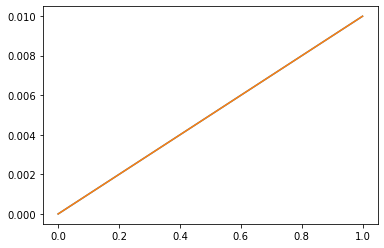

In [14]:
plt.plot(z,np.sort(abs(0.05-h/2-lineleft)))
plt.plot(z,abs(0.05+h/2-lineright))

In [15]:
min(x)

0.04000000953674317

In [16]:
max(x)

0.05999999046325684

In [17]:
min(y)

0.01

In [18]:
max(y)

0.029999980926513674

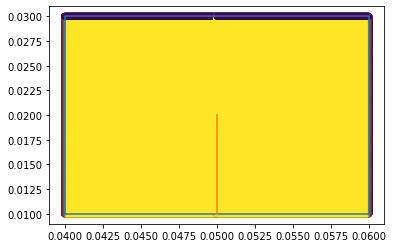

In [19]:
plt.plot(xareaPD,yareaPD)
plt.plot([0.05,0.05],[0.01,0.02])
plt.scatter(x,y,c=volume)

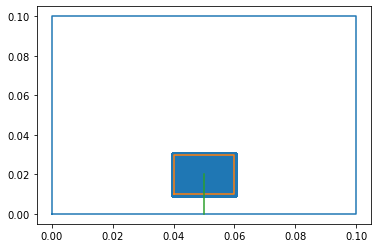

In [20]:
plt.plot(xarea,yarea)
plt.plot(xareaPD,yareaPD)
plt.plot([0.05,0.05],[0,0.02])
plt.scatter(x,y)

In [21]:
writer = vtk.vtkXMLUnstructuredGridWriter()
writer.SetFileName("coupling_"+str(n)+".vtu")
grid = vtk.vtkUnstructuredGrid()
points = vtk.vtkPoints()
points.SetNumberOfPoints(len(x))
points.SetDataTypeToDouble()

for i in range(0,len(x)):
    points.InsertPoint(i,x[i],y[i],0.)
    
grid.SetPoints(points)


dataOut = grid.GetPointData()
array = vtk.vtkDoubleArray()
array.SetName("Volumes")
array.SetNumberOfComponents(1)
array.SetNumberOfTuples(len(x))

for i in range(0,len(x)):
    array.SetTuple1(i,volume[i])
dataOut.AddArray(array)


writer.SetInputData(grid)
writer.GetCompressor().SetCompressionLevel(0)
writer.SetDataModeToAscii()
writer.Write()

1

In [22]:
%%bash 
ls

Construct-aligned-mesh-example1.ipynb
Construct-aligned-mesh-example2.ipynb
coupling_128_pum.vtk
coupling_128_pum.vtu
coupling_128.vtk
coupling_128.vtu
coupling_16.vtk
coupling_16.vtu
coupling_32_pum.vtk
coupling_32_pum.vtu
coupling_32.vtk
coupling_32.vtu
coupling_512.vtu
coupling_64.vtk
coupling_64.vtu
images-coarse.pvsm
images-fine.pvsm
input-2.yaml
input.yaml
out-coarse
out-fine
pd_cuttoff_damage-new-2.png
pd_cuttoff_damage-new-2-slice.png
pd_cuttoff_damage-new.png
pd_cuttoff_damage-new-slice.png
pd_cuttoff-new-2.png
pd_cuttoff-new-2-slice.png
pd_cuttoff-new.png
pd_cuttoff-new-slice.png
pum_modeI_constant-slice.png
pum_modeI_dynamic-slice.png


In [23]:
import meshio

In [24]:
points = []
cells = []
for i in range(0,len(x)):
    points.append([x[i],y[i],0])
    cells.append(("vertex", [[i]]))

In [25]:
mesh = meshio.Mesh(
    points,
    cells,
    # Optionally provide extra data on points, cells, etc.
    point_data={"Volume": volume},
    # Each item in cell data must match the cells array
)
mesh.write(
    "coupling_"+str(n)+".vtk",  # str, os.PathLike, or buffer/open file
    # file_format="vtk",  # optional if first argument is a path; inferred from extension
)

In [26]:
%%bash 
ls

Construct-aligned-mesh-example1.ipynb
Construct-aligned-mesh-example2.ipynb
coupling_128_pum.vtk
coupling_128_pum.vtu
coupling_128.vtk
coupling_128.vtu
coupling_16.vtk
coupling_16.vtu
coupling_32_pum.vtk
coupling_32_pum.vtu
coupling_32.vtk
coupling_32.vtu
coupling_512.vtk
coupling_512.vtu
coupling_64.vtk
coupling_64.vtu
images-coarse.pvsm
images-fine.pvsm
input-2.yaml
input.yaml
out-coarse
out-fine
pd_cuttoff_damage-new-2.png
pd_cuttoff_damage-new-2-slice.png
pd_cuttoff_damage-new.png
pd_cuttoff_damage-new-slice.png
pd_cuttoff-new-2.png
pd_cuttoff-new-2-slice.png
pd_cuttoff-new.png
pd_cuttoff-new-slice.png
pum_modeI_constant-slice.png
pum_modeI_dynamic-slice.png


In [27]:
mesh = meshio.read(
    "coupling_"+str(n)+".vtk",  # string, os.PathLike, or a buffer/open file
    # file_format="stl",  # optional if filename is a path; inferred from extension
    # see meshio-convert -h for all possible formats
)